In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [10]:
input_file = r"H:\DDGAN\npy_uvw"
output_file = r"H:\DDGAN\samples"
os.makedirs(output_file, exist_ok=True)

In [15]:
def block_picking(path_1, path_2, path_3):
    """
    grid_1 at t^N
    grid_2 at t^(N+1)
    grid_3 is building info matrix
    (x,y) is picked randomly to extract a block
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    grid_3 = np.load(path_3)

    width, height = grid_3.shape
    min = 64                                # Minimum offset
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    h_block = grid_3[y:y+64, x:x+64]
    matrix_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1 ):
        grid_2 = t_2[i-1]
        N_block = grid_2[y+64:y+128, x:x+64]        
        E_block = grid_2[y:y+64, x+64:x+128]
        W_block = grid_2[y:y+64, x-64:x]
        S_block = grid_2[y-64:y, x:x+64]
        C_block = grid_1[y:y+64, x:x+64]

        stack_matrix = np.vstack([N_block, E_block, W_block, S_block, C_block, h_block])
        matrix_list.append(stack_matrix)

    print(x,y)

    return matrix_list

In [8]:
def plot_matrices(matrix_list):
    """
    plot function
    """
    num_matrices = len(matrix_list)
    fig, axes = plt.subplots(1, num_matrices, figsize=(200, 100))
    for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.set_xlabel('Column Index')
        ax.set_ylabel('Row Index')
    plt.tight_layout()
    plt.show()

In [17]:
# # Testing for funciton output before standardization
path_1 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy'
path_2 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_1.npy'
path_3 = r'H:\DDGAN\building_location.npy'

matrix_list = block_picking(path_1,path_2,path_3)
print("\nAccessing stored matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

plot_matrices(matrix_list)

93 77

Accessing stored matrices:
Matrix 1 size: (384, 64)
Matrix 2 size: (384, 64)
Matrix 3 size: (384, 64)


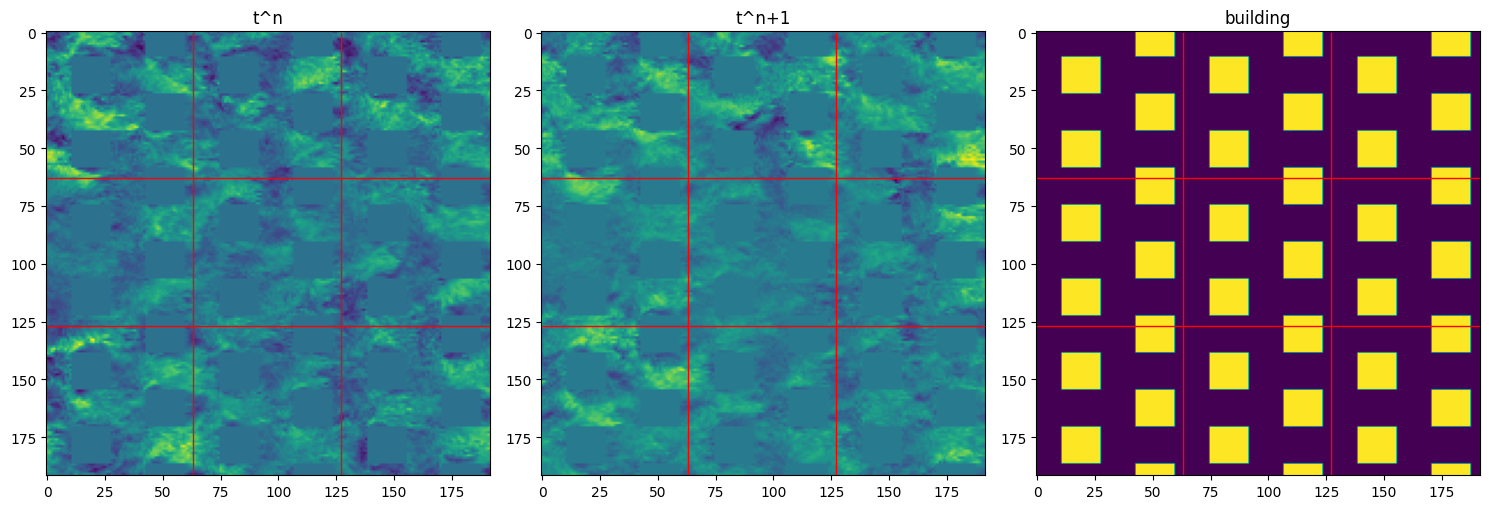

In [18]:
# Testing for funciton output before standardization
path_1 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy' 
path_2 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_1.npy' 
path_3 = r'H:\DDGAN\building_location.npy' 
t_1 = np.load(path_1)
t_2 = np.load(path_2)
t_3 = np.load(path_3)
matrix_a = t_1[0]
matrix_b = t_2[0]
matrix_c = t_3
x = 93
y = 77
height, width = matrix_a.shape
x_min = x - 64
x_max = x + 64*2
y_min = y - 64
y_max = y + 128
testing_domain_0 = matrix_a[y_min:y_max, x_min:x_max]
testing_domain_1 = matrix_b[y_min:y_max, x_min:x_max]
testing_domain_2 = matrix_c[y_min:y_max, x_min:x_max]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

lines = {
    'horizontal_mid1': ([63, 63], [0, 191]),
    'horizontal_mid2': ([127, 127], [0, 191]),
    'vertical_mid1': ([0, 191], [63, 63]),
    'vertical_mid2': ([0, 191], [127, 127])
}
matrices = [testing_domain_0, testing_domain_1, testing_domain_2]
titles = ['t^n', 't^n+1', 'building']

# Plot each matrix with lines
for ax, matrix, title in zip(axes, matrices, titles):
    im = ax.imshow(matrix, cmap='viridis')
    ax.set_title(title)
    
    # Draw lines on the matrix
    for line in lines.values():
        ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

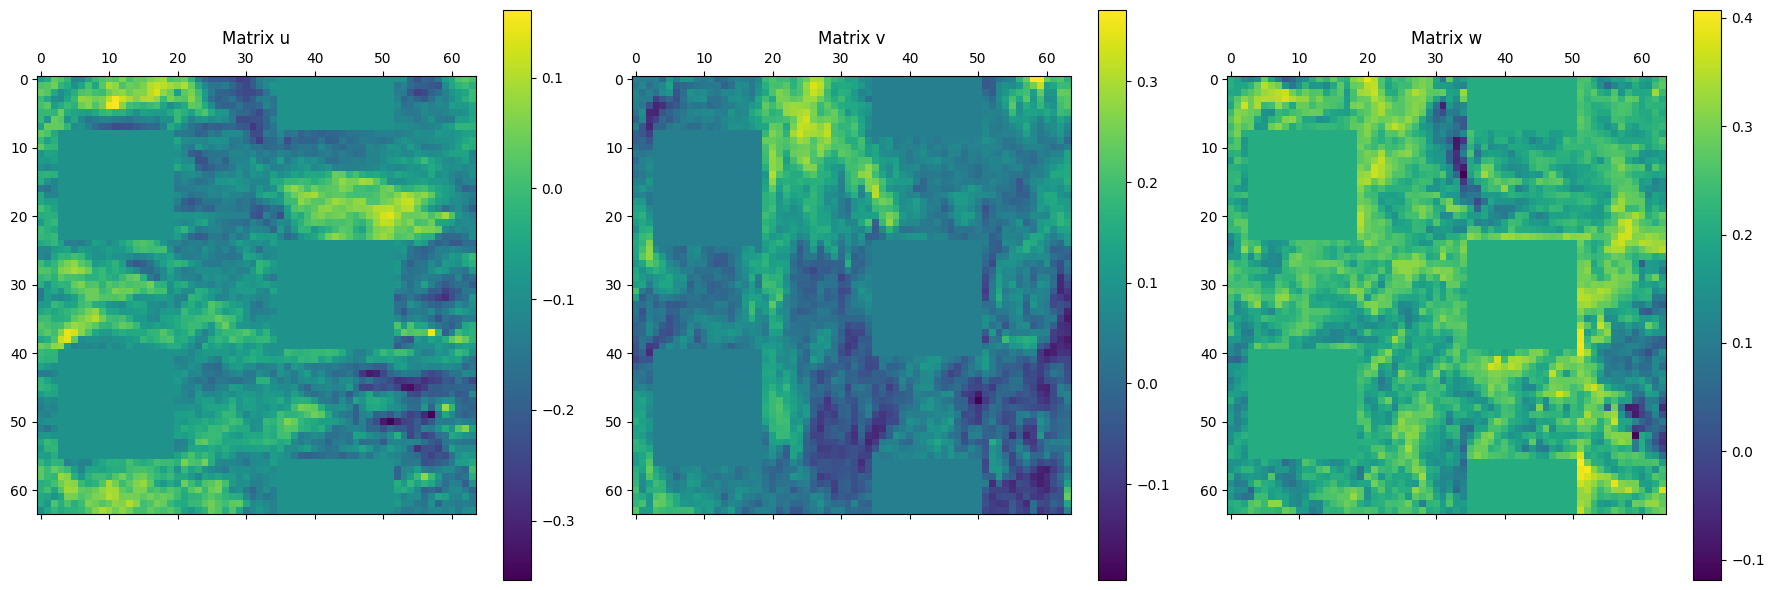

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data from the uploaded .npy file
data = np.load(r'H:\DDGAN\norm_d\norm_d_sample_1.npy')

# Check the structure and contents of the loaded data to identify the matrices u, v, w
data.shape, data

# Extract the matrices u, v, w
u = data[0]
v = data[1]
w = data[2]

# Create plots for each matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Matrix u', 'Matrix v', 'Matrix w']

for ax, matrix, title in zip(axes, [u, v, w], titles):
    cax = ax.matshow(matrix, cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import os
import glob

def extract_time_step(filename):
    """ 
    Extract the numeric part from the filename 'uvw_X.npy'
    """
    base = os.path.basename(filename)
    number_part = base.split('_')[1].split('.')[0] 
    return int(number_part)

def block_picking(path_1, path_2, path_3):
    """
    grid_1 at t^N
    grid_2 at t^(N+1)
    grid_3 is building info matrix
    (x,y) is picked randomly to extract a block
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    grid_3 = np.load(path_3)

    width, height = grid_3.shape
    min = 64                                # Minimum offset
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    h_block = grid_3[y:y+64, x:x+64]

    stacked_matrix_list = []
    center_matrix_list = []
    

    for i, grid_1 in enumerate(t_1[:3], start=1 ):
        grid_2 = t_2[i-1]
        N_block = grid_2[y+64:y+128, x:x+64]
        E_block = grid_2[y:y+64, x+64:x+128]
        W_block = grid_2[y:y+64, x-64:x]
        S_block = grid_2[y-64:y, x:x+64]
        C_block = grid_1[y:y+64, x:x+64]
        tn1_C_block = grid_2[y:y+64, x:x+64]

        stack_matrix = np.vstack([N_block, E_block, W_block, S_block, C_block])
        stacked_matrix_list.append(stack_matrix)
        center_matrix_list.append(tn1_C_block)

    print(x,y)

    return stacked_matrix_list, center_matrix_list, h_block

path_3 = path_3 = r'H:\DDGAN\building_height.npy'
directory = r"H:\DDGAN\npy_uvw"
files = sorted(glob.glob(os.path.join(directory, 'uvw_*.npy')), key=extract_time_step)

output_directory_1 = r'H:\DDGAN\samples_g'
output_directory_2 = r'H:\DDGAN\samples_d'
output_directory_3 = r'H:\DDGAN\samples_h'
os.makedirs(output_directory_1, exist_ok=True)
os.makedirs(output_directory_2, exist_ok=True)
os.makedirs(output_directory_3, exist_ok=True)

timestep = 0

for i in range(min(100, len(files) - 1)):

    path_1 = files[i]
    path_2 = files[i + 1]
    print(f"Processing pair: {os.path.basename(path_1)} and {os.path.basename(path_2)}")

    for j in range(5):
        print(f"timestep = ",timestep)
        stacked_matrix_list, center_matrix_list, h_block = block_picking(path_1,path_2,path_3)

        u_matrix_input = stacked_matrix_list[0]
        v_matrix_input = stacked_matrix_list[1]
        w_matrix_input = stacked_matrix_list[2]

        u_c_matrix = center_matrix_list[0]
        v_c_matrix = center_matrix_list[1]
        w_c_matrix = center_matrix_list[2]

        h_block = h_block

        print(f"u_matrix size",{u_matrix_input.shape})
        print(f"u_c_matrix size",{u_c_matrix.shape})

        np.save(os.path.join(output_directory_1, f"g_sample_{timestep}.npy"), [u_matrix_input, v_matrix_input, w_matrix_input])
        np.save(os.path.join(output_directory_2, f"d_sample_{timestep}.npy"), [u_c_matrix, v_c_matrix, w_c_matrix])
        np.save(os.path.join(output_directory_3, f"h_sample_{timestep}.npy"), [h_block])


        timestep += 1